In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [24]:
d = pd.read_csv('../tables/2024_03_11_merged_03.csv', parse_dates=['Time_Mid'])
d['CO_ppm'].describe()

count    13082.000000
mean         0.118462
std          0.024820
min          0.061900
25%          0.100650
50%          0.121100
75%          0.136000
max          0.255300
Name: CO_ppm, dtype: float64

In [25]:
transit_flights = [pd.Timestamp('2022-03-22').date(), pd.Timestamp('2022-05-18').date(), pd.Timestamp('2022-05-21').date(), pd.Timestamp('2022-05-31').date(), pd.Timestamp('2022-06-18').date()]
d = d[d['Time_Mid'].dt.month.isin([8, 9]) & (~d['Time_Mid'].dt.date.isin(transit_flights))]

In [26]:
d[d['CCN_n_pred'] / d['N_CCN_stdPT'] > 6]['CO_ppm'].describe()

count    32.000000
mean      0.138720
std       0.010228
min       0.108700
25%       0.134350
50%       0.138800
75%       0.143500
max       0.162800
Name: CO_ppm, dtype: float64

In [27]:
d[d['CCN_n_pred'] / d['N_CCN_stdPT'] < 3]['CO_ppm'].describe()

count    448.000000
mean       0.119612
std        0.021069
min        0.063250
25%        0.105937
50%        0.124975
75%        0.135562
max        0.170200
Name: CO_ppm, dtype: float64

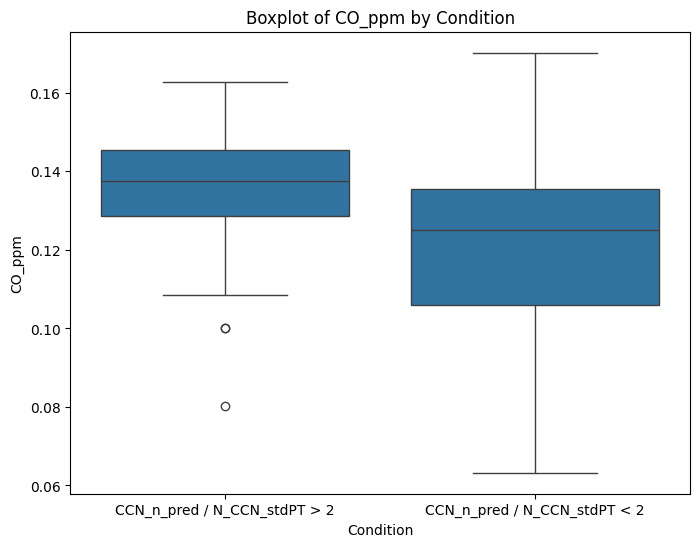

In [29]:
# Assuming 'd' is your DataFrame

# Create two subsets based on the conditions
subset1 = d[d['CCN_n_pred'] / d['N_CCN_stdPT'] > 3]['CO_ppm']
subset2 = d[d['CCN_n_pred'] / d['N_CCN_stdPT'] < 3]['CO_ppm']

# Combine the subsets into a single DataFrame for plotting
data = pd.DataFrame({
    'CO_ppm': pd.concat([subset1, subset2]),
    'Condition': ['CCN_n_pred / N_CCN_stdPT > 2'] * len(subset1) + ['CCN_n_pred / N_CCN_stdPT < 2'] * len(subset2)
})

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Condition', y='CO_ppm', data=data)
plt.title('Boxplot of CO_ppm by Condition')
plt.xlabel('Condition')
plt.ylabel('CO_ppm')
plt.show()